In [1]:
# import the required libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy import stats
from scipy.stats import norm, skew
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from scipy.special import boxcox1p

In [2]:
# read as a pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/starcraft_player_data.csv")
df.head() # get an idea of how the first few columns of the dataframe looks like

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [3]:
# looks like the NA values are just "?" marks since it shows that all the values are non-null values but there are some missing values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [4]:
# check the datatypes of the values in the data since later on we need all of the features to be of the same datatype.
df.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [5]:
(df[list(df.columns)] == '?').sum() # check the number of missing values for each of the features.

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

In [6]:
# Do some EDA
df['Age'].value_counts()
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


Remove the rows with "?" values:

In [7]:
df = df[(df.Age != '?') & (df.TotalHours != '?') & (df.HoursPerWeek != '?')]
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,9261,4,20,8,400,158.1390,0.013829,0.000504,7,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30,0.001035,7,0.0,0.000287
3336,9264,5,16,56,1500,186.1320,0.006951,0.000360,6,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38,0.001343,7,0.0,0.000388
3337,9265,4,21,8,100,121.6992,0.002956,0.000241,8,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.0,0.000000
3338,9270,3,20,28,400,134.2848,0.005424,0.000182,5,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18,0.000934,5,0.0,0.000000


In [9]:
# GameID and Age seem to be irrelevant to the problem that we are trying to solve. I have dropped HoursPerWeek since I am using the TotalHours

df = df.drop(columns = ['GameID', 'Age', 'HoursPerWeek'])
y_df = df['LeagueIndex'] # this is the values that we are trying to predict which is going to be our response variable or the labels.
df = df.drop(columns = ['LeagueIndex']) # drop the labels column from the dataframe

Some plots:

array([[<Axes: title={'center': 'TotalHours'}>,
        <Axes: title={'center': 'APM'}>,
        <Axes: title={'center': 'SelectByHotkeys'}>,
        <Axes: title={'center': 'AssignToHotkeys'}>],
       [<Axes: title={'center': 'UniqueHotkeys'}>,
        <Axes: title={'center': 'MinimapAttacks'}>,
        <Axes: title={'center': 'MinimapRightClicks'}>,
        <Axes: title={'center': 'NumberOfPACs'}>],
       [<Axes: title={'center': 'GapBetweenPACs'}>,
        <Axes: title={'center': 'ActionLatency'}>,
        <Axes: title={'center': 'ActionsInPAC'}>,
        <Axes: title={'center': 'TotalMapExplored'}>],
       [<Axes: title={'center': 'WorkersMade'}>,
        <Axes: title={'center': 'UniqueUnitsMade'}>,
        <Axes: title={'center': 'ComplexUnitsMade'}>,
        <Axes: title={'center': 'ComplexAbilitiesUsed'}>]], dtype=object)

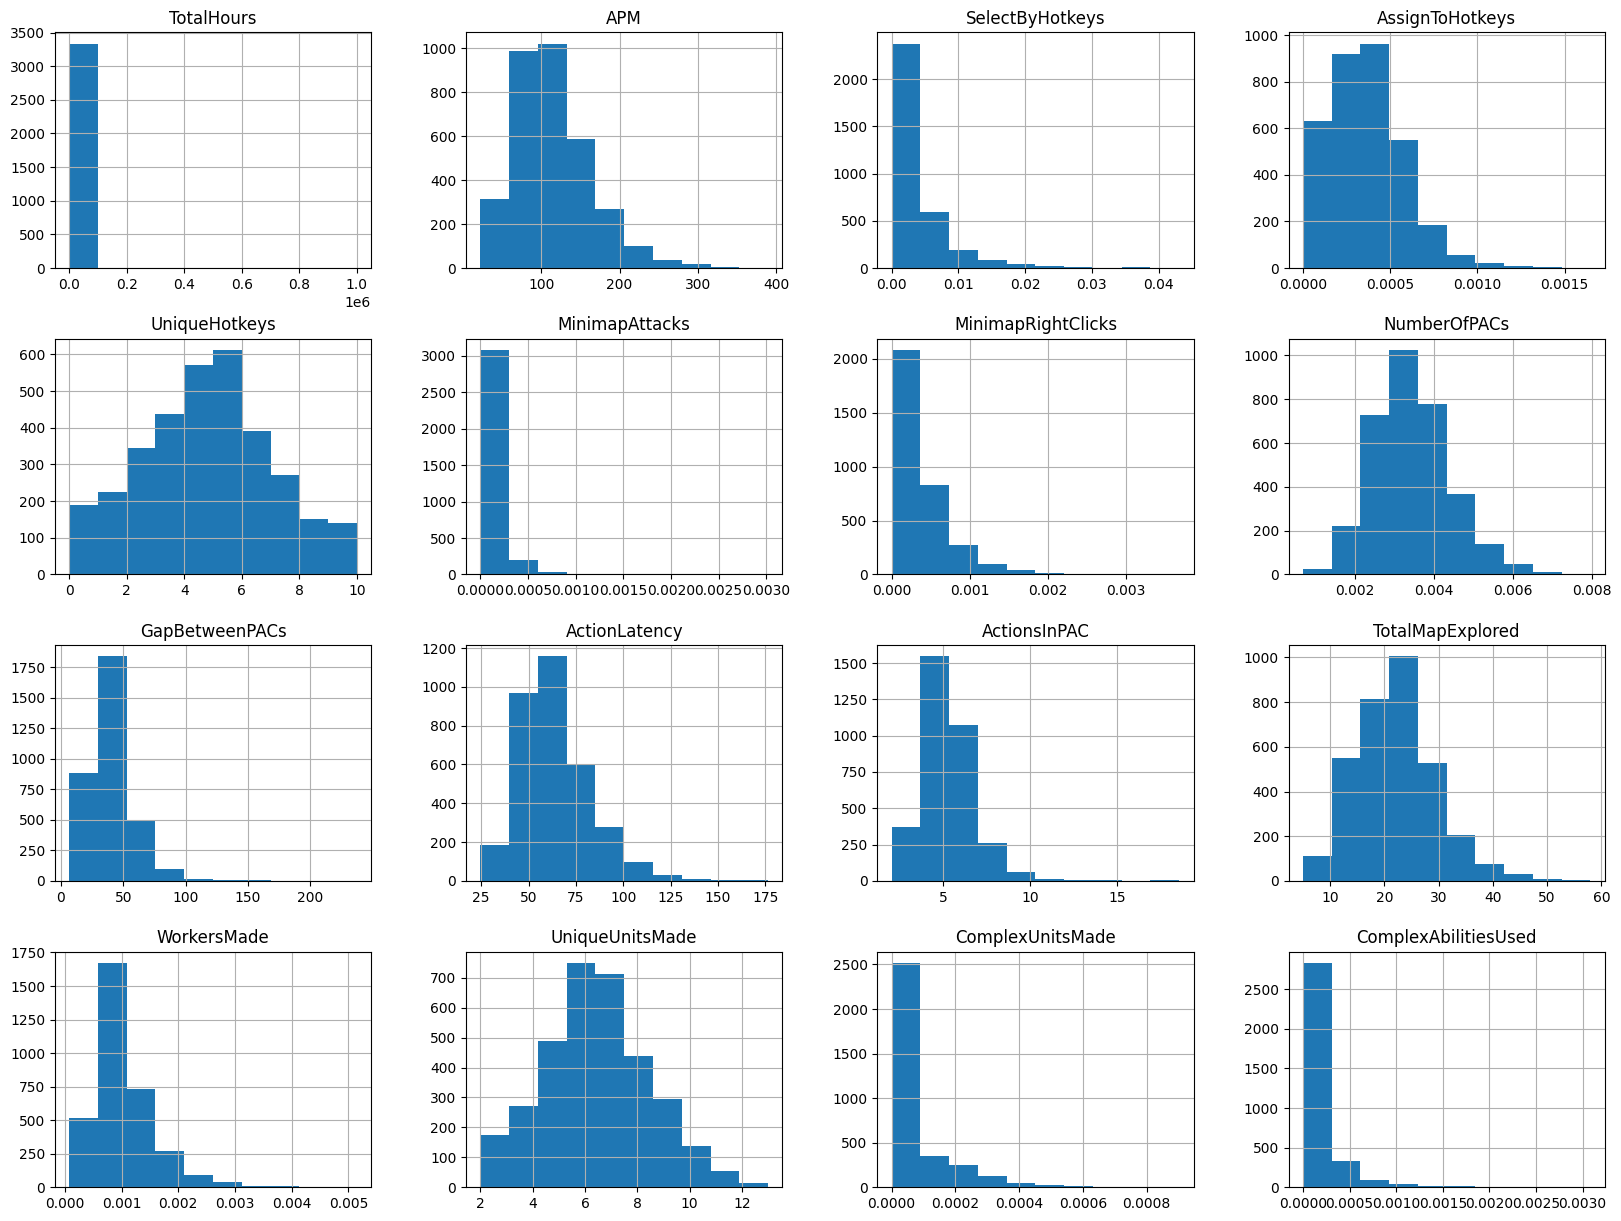

In [10]:
# Plot histograms for each featur to get an idea of the distributions of each of them.

df.hist(bins = 10, figsize = (20,15))

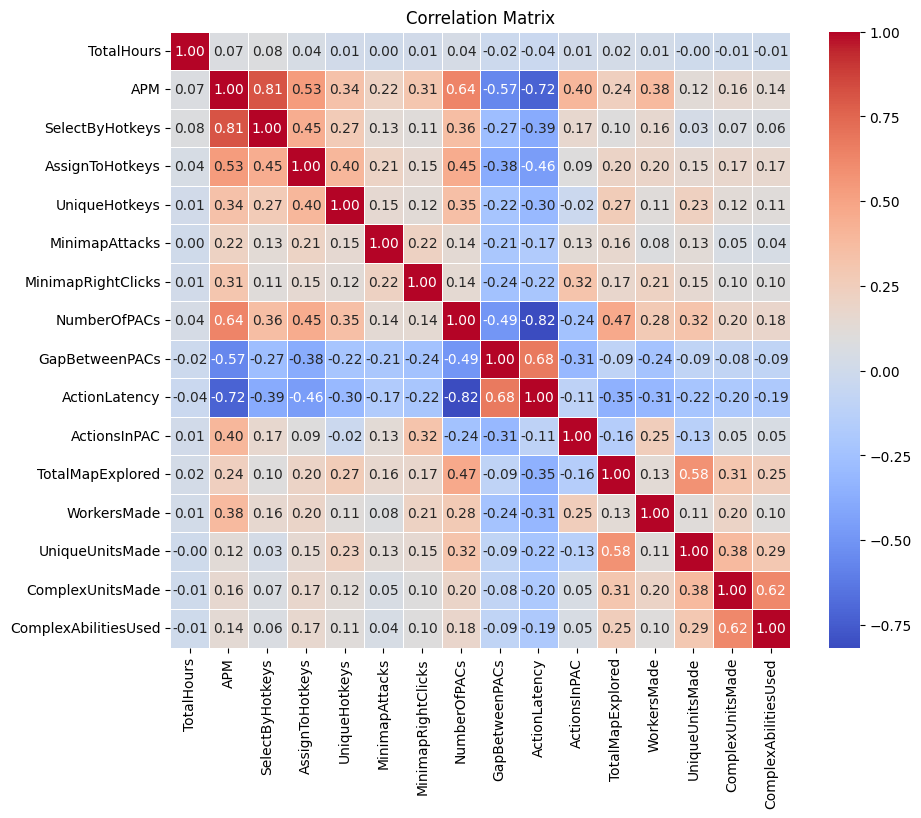

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix') # set the title
plt.show() # display the plot

As we can see from above there is a high correlation between APM and Selectbyhotkeys and NumberofPACs and ActionLatency, so we need to take care of that.

<ipython-input-12-a26a5d4b40d5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['APM'] , fit=norm);



 mu = 114.58 and sigma = 48.10



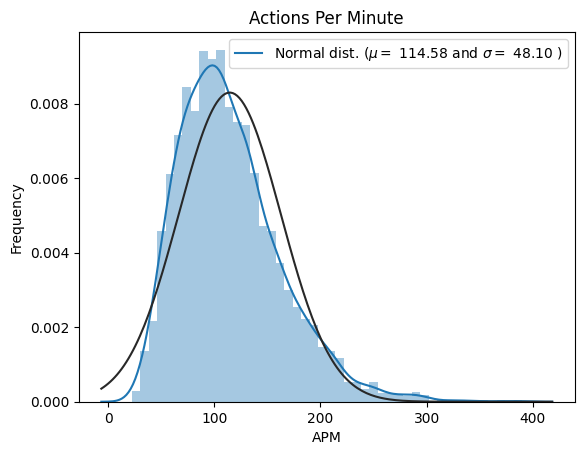

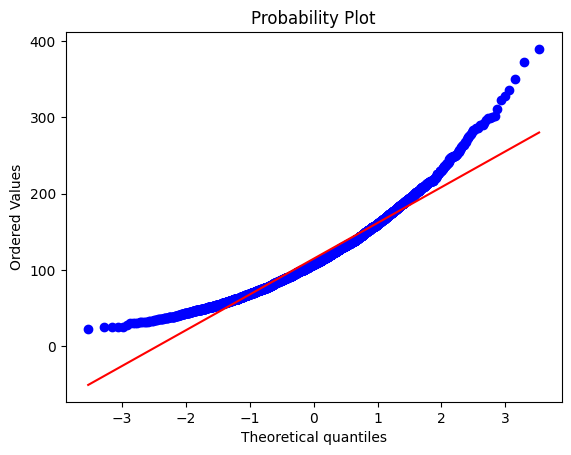

In [12]:
data = df
sns.distplot(data['APM'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['APM'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Actions Per Minute')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['APM'], plot=plt)
plt.show()

In [13]:
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features

skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
TotalHours,57.539478
MinimapAttacks,5.150198
ComplexAbilitiesUsed,3.799682
SelectByHotkeys,2.982392
ComplexUnitsMade,2.284495
MinimapRightClicks,2.219066
GapBetweenPACs,1.950846
WorkersMade,1.664480
ActionsInPAC,1.611997
ActionLatency,1.195135


In [14]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Log-Log transform".format(skewness.shape[0]))

skewed_features = skewness.index
for feat in skewed_features:
    data[feat] = np.log1p(data[feat])

There are 16 skewed numerical features to Log-Log transform


<ipython-input-15-f4d4aa224d21>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['APM'] , fit=norm);



 mu = 4.66 and sigma = 0.42



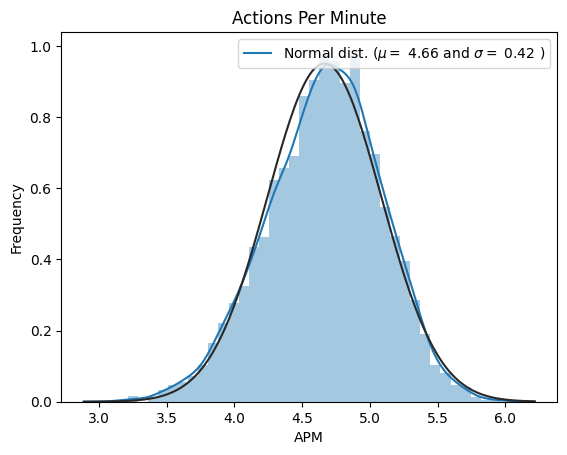

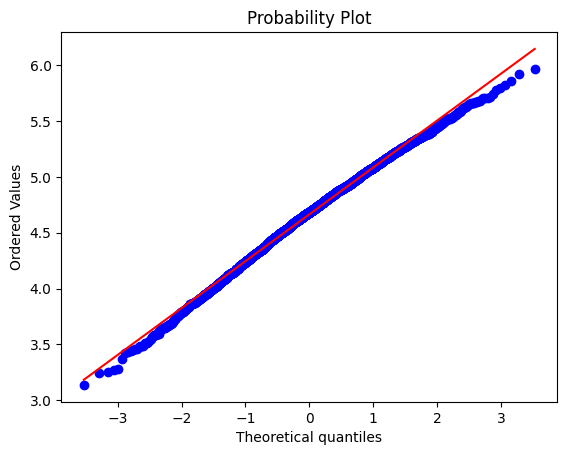

In [15]:
sns.distplot(data['APM'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['APM'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Actions Per Minute')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['APM'], plot=plt)
plt.show()

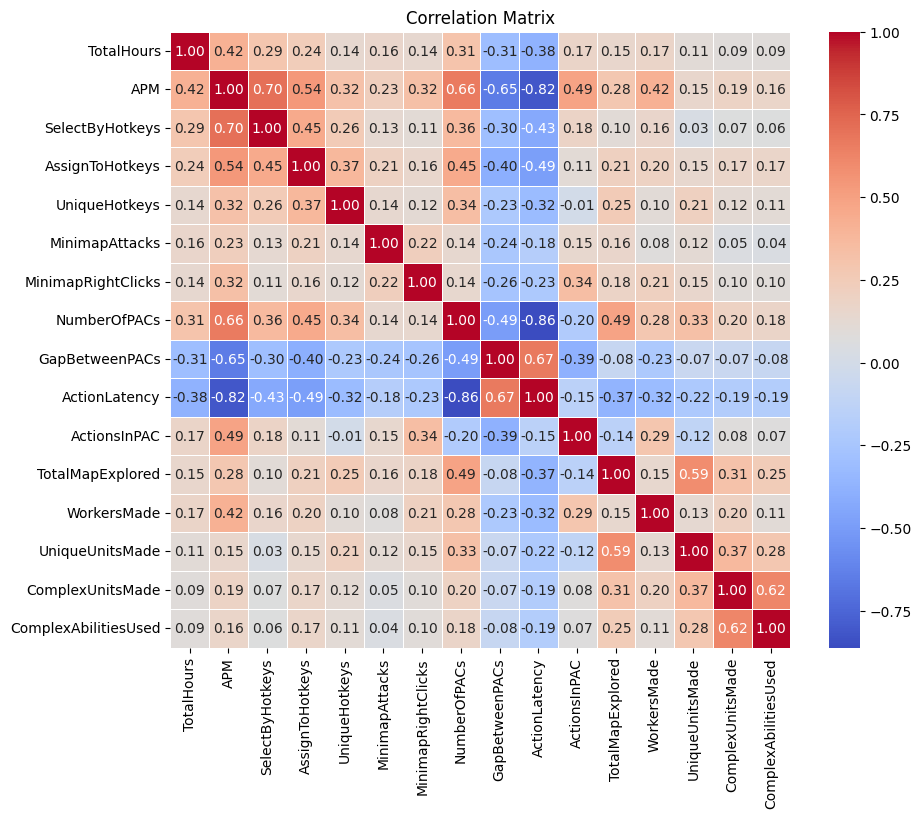

In [16]:
correlation_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title and display the plot
plt.title('Correlation Matrix')
plt.show()

Do some transformations to take care of the high correlations:

In [17]:
data['apm_pac'] = data['APM']*data['NumberOfPACs']
data['apm_al'] = data['APM']*data['ActionLatency']
data = data.drop(columns = ['APM', 'NumberOfPACs', 'ActionLatency'])

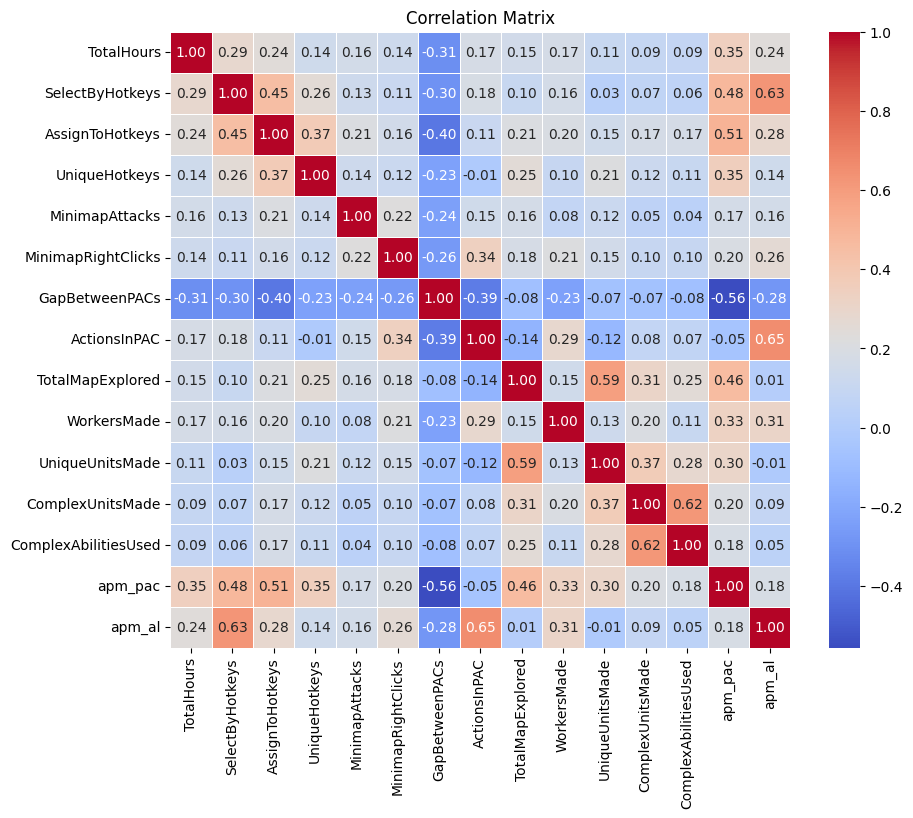

In [18]:
correlation_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title and display the plot
plt.title('Correlation Matrix')
plt.show()

Funcitonalizing repetitive tasks:
I would say that it is not necessary that we functionalize the above steps that we have taken since it might depend on the data that we are working with. If we are working with similar data (which I would recommend later when stakeholders need to be advised on how to collect new data).

# Pick a metric: Accuracy: number of correct correct predictions over the total number of predictions.

Now we are going to pick a baseline Multiple Logistic regression model and check the accuracy and based on that try a different model to improve the accuracy:

In [ ]:
# pick a baseline model:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, y_df, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Now we are going to try a RandomForest Classifier with Grid search to pick the best hyperparameters:

In [23]:
# Assuming you have a numpy array 'X' containing the features and a numpy array 'y' containing the labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, y_df, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters and evaluate the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and the accuracy of the model
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.38023952095808383


# Visualization for the accuracy of the model for specific predicted labels:

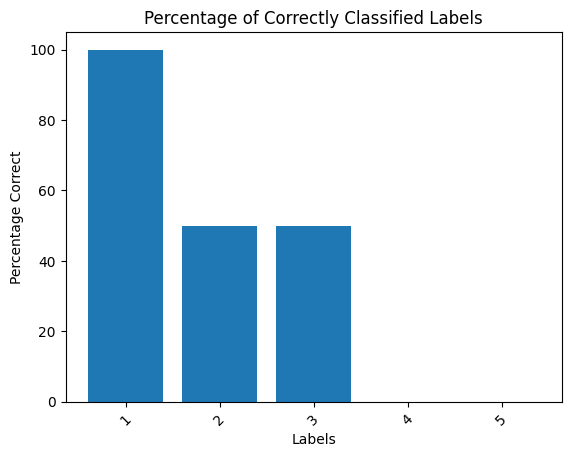

In [31]:
def visualize_classification(y_test, y_pred):
    labels = list(set(y_test))  # Get unique labels
    correct_counts = [sum((y_test[i] == label) and (y_pred[i] == label) for i in range(len(y_test))) for label in labels]
    total_counts = [sum(y_test[i] == label for i in range(len(y_test))) for label in labels]
    percentages = [correct_count / total_count * 100 if total_count != 0 else 0 for correct_count, total_count in zip(correct_counts, total_counts)]

    # Create bar plot
    fig, ax = plt.subplots()
    ax.bar(labels, percentages)
    ax.set_xlabel('Labels')
    ax.set_ylabel('Percentage Correct')
    ax.set_title('Percentage of Correctly Classified Labels')
    plt.xticks(rotation=45)
    plt.show()

visualize_classification(list(y_test), list(y_pred))

# Extra: Trying a deep learning model with a softmax classifier to show the importance of collecting more data and to show that not just having a good model would work.

In [ ]:
# Trying a deep learning model for prediction using a softmax classifier:

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Perform label encoding to convert labels to one-hot encoded vectors
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

input_dim = X.shape[1]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.2, random_state=42)

# Step 2: Define the deep learning model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Step 4: Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

Epoch 1/10
84/84 [==============================] - 1s 2ms/step - loss: 12.1657 - accuracy: 0.2300
Epoch 2/10
84/84 [==============================] - 0s 2ms/step - loss: 10.7790 - accuracy: 0.2850
Epoch 3/10
84/84 [==============================] - 0s 1ms/step - loss: 4.1842 - accuracy: 0.3371
Epoch 4/10
84/84 [==============================] - 0s 2ms/step - loss: 2.6741 - accuracy: 0.3483
Epoch 5/10
84/84 [==============================] - 0s 1ms/step - loss: 2.1342 - accuracy: 0.3423
Epoch 6/10
84/84 [==============================] - 0s 1ms/step - loss: 1.8965 - accuracy: 0.3494
Epoch 7/10
84/84 [==============================] - 0s 2ms/step - loss: 8.6470 - accuracy: 0.2948
Epoch 8/10
84/84 [==============================] - 0s 2ms/step - loss: 13.8091 - accuracy: 0.2914
Epoch 9/10
84/84 [==============================] - 0s 1ms/step - loss: 4.8905 - accuracy: 0.3449
Epoch 10/10
21/21 [==============================] - 0s 5ms/step - loss: 2.5605 - accuracy: 0.3278
Accuracy: 0.3278

As we can see even after so much transformation even the deep learning model is not performing as good as the Random Forest Classifier whose accuracy is only 39%. So, we can say that we need to collect a lot more data for our models to perform better.

Explanation to non-techincal stakeholders:

1. The objective of the model: The main purpose of the model is to be able to predict the rank (LeagueIndex) which is a value in the range 1-8 of each player given various input features: Below are the features described in a table.

| Feature | Description                                              | Data Type |
|---------|----------------------------------------------------------|-----------|
| GameID  | Unique ID number for each game                            | integer   |
| LeagueIndex | Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 | ordinal |
| Age | Age of each player | integer |
| HoursPerWeek | Reported hours spent playing per week | integer |
| TotalHours | Reported total hours spent playing | integer |
| APM | Action per minute | continuous |
| SelectByHotkeys | Number of unit or building selections made using hotkeys per timestamp | continuous |
| AssignToHotkeys | Number of units or buildings assigned to hotkeys per timestamp | continuous |
| UniqueHotkeys | Number of unique hotkeys used per timestamp | continuous |
| MinimapAttacks | Number of attack actions on minimap per timestamp | continuous |
| MinimapRightClicks | Number of right-clicks on minimap per timestamp | continuous |
| NumberOfPACs | Number of PACs per timestamp | continuous |
| GapBetweenPACs | Mean duration in milliseconds between PACs | continuous |
| ActionLatency | Mean latency from the onset of a PACs to their first action in milliseconds | continuous |
| ActionsInPAC | Mean number of actions within each PAC | continuous |
| TotalMapExplored | The number of 24x24 game coordinate grids viewed by the player per timestamp | continuous |
| WorkersMade | Number of SCVs, drones, and probes trained per timestamp | continuous |
| UniqueUnitsMade | Unique units made per timestamp | continuous |
| ComplexUnitsMade | Number of ghosts, infestors, and high templars trained per timestamp | continuous |
| ComplexAbilitiesUsed | Abilities requiring specific targeting instructions used per timestamp | continuous |


2. The accuracy metric of the model: The accuracy for the model is defined as the number of correctly predicted/classified examples vs the total number of examples tested. For example: let's say I had 10 examples in my test set which I am trying to see how the model predicts and these are the actual labels: [1,2,3,4,5,6,7,8,2,3] and the predicted labels are [2,2,3,4,5,6,8,1,4,5] so here we can see that only 5 of the examples have been correctly predicted out of the 10 example that are being predicted so the accuracy would be 0.5 or 50%. So, our goal to have the accuracy as high as possible which would be as close to the value 1 (100%).


3. Context for comparison: As we can see our LogisticRegression model perfromed with an accuracy of 36% but the RandomForestClassifier performed with a better accuracy of about 39% while picking the best hyperparameters.


How to collect more data:

When it comes to improving the performance of machine learning models, it's important to recognize that it's often the data, rather than the model itself, that plays a crucial role. While models are designed to learn patterns and make predictions based on the available data, they can only be as effective as the quality and diversity of the data they are trained on.

In the context of the particular visualization above that shows the model's performance for specific labels, it becomes evident that the model is not performing optimally for those particular labels. This observation suggests that there may be insufficient data available to adequately train the model on those specific labels. To address this issue and enhance the model's accuracy for the problematic labels, it becomes necessary to collect more data that focuses on those specific areas. By obtaining additional data points related to those labels, we can provide the model with a more comprehensive and representative training set. This expanded dataset can help the model capture the intricacies and nuances associated with the problematic labels, ultimately leading to improved performance and more reliable predictions.